In [1]:
# load modules
import os
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
data = pd.read_csv(os.path.join('data', 'UniversalBank.csv'))
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


In [3]:
# remove ID
data = data.drop(['ID', 'ZIP Code'], axis=1)

# Education: dummies
data = pd.get_dummies(data, columns=['Education'], drop_first=True)

# target variable: Personal Loan
y = data['Personal Loan'].values
X = data.drop('Personal Loan', axis=1)
xcolumns = X.columns.values
X = X.values

In [4]:
xcolumns

array(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage',
       'Securities Account', 'CD Account', 'Online', 'CreditCard',
       'Education_2', 'Education_3'], dtype=object)

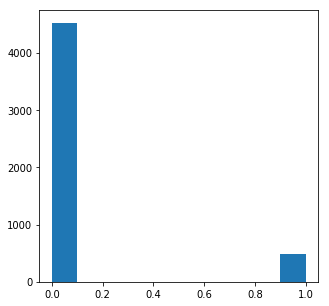

In [5]:
plt.figure(figsize=(5, 5))
plt.hist(data['Personal Loan'])
plt.show()

In [6]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=2019)

In [7]:
# Grid Search
rf = RandomForestClassifier(random_state=2019)

param_grid = {'n_estimators': [10, 50, 100, 200],
              'criterion': ['gini', 'entropy'],
              'max_depth': [None, 2, 4, 6]}
rf_cv = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=2019, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 50, 100, 200], 'criterion': ['gini', 'entropy'], 'max_depth': [None, 2, 4, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [8]:
print('Best parameters (Grid Search): \n',
      rf_cv.best_params_)

Best parameters (Grid Search): 
 {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 200}


In [9]:
y_pred = rf_cv.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[898   2]
 [ 15  85]]


In [10]:
acc = accuracy_score(y_test, y_pred)
print('[Accuracy]: {:.2f}%'.format(acc * 100))

[Accuracy]: 98.30%


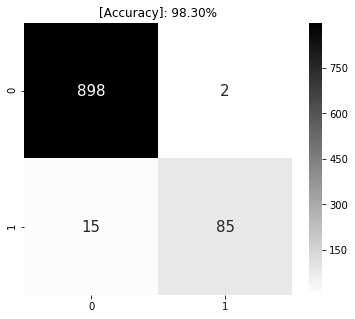

In [11]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm,
            annot=True, annot_kws={'size': 15}, fmt='d',
            cmap='binary')
plt.title('[Accuracy]: {:.2f}%'.format(acc * 100))
plt.show()

In [12]:
# Sort: descending order
importances = rf_cv.best_estimator_.feature_importances_
index = np.argsort(importances)[::-1]

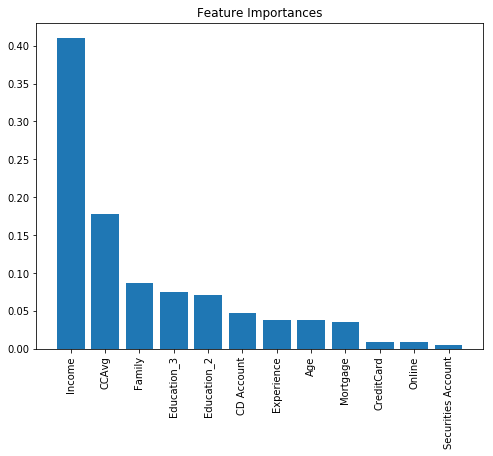

In [15]:
plt.figure(figsize=(8, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]),
        importances[index],
        align='center')
plt.xticks(range(X.shape[1]), xcolumns[index], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()